# Factors Affecting Second-hand Car Prices
## Introduction

Amidst the profound impact of the pandemic on the global economy, consumer attitudes towards purchasing automobiles have significantly shifted. Particularly in times of increased economic uncertainty, the secondary market for automobiles has garnered considerable attention. People have started to place greater emphasis on considering used cars as a viable economic choice, making it crucial to understand the factors influencing the prices of these secondhand vehicles.

Through empirical analysis in this study, we hope to reveal which factors hold the most substantial influence on used car prices during the current economic environment, providing valuable market insights for consumers and decision-makers in the automotive industry. The ultimate goal is not to build a predictive model but to determine the crucial factors affecting used car prices during economic turbulence, enabling a more precise assessment and pricing in the secondary car market.

## Background and Literature

Kim [2022] proposed that due to the economic contraction caused by covid-19, consumers' demand for the secondhand market gradually increased. The paper emphasized the importance of the post-pandemic era's secondhand market by studying the relationship between different consumption motivations, attitudes, and intentions among 467 Korean participants in choosing secondhand items. It also established the connection between consumer motivations, attitudes, and actual purchase intentions.

Thomas [2003] investigated the potential demand for secondhand and new goods. He utilized an economic model developed by Anderson and Ginsburgh as the foundation for the study. The research revealed that when transaction costs decrease or product lifetimes extend, there is an increase in demand for the secondhand market. Although people tend to favor new goods when the supply of secondhand goods diminishes, it's not a one-to-one substitution relationship. Therefore, overall, secondhand goods are gradually becoming mainstream.

Cornut's [2016] research involved a longitudinal analysis of car ownership and travel demand in the Greater Paris metropolitan area. Conducting five consecutive independent surveys and employing a pseudo-panel data approach to group households into cohorts, he found an income elasticity of car ownership at 0.47. This implies that as income rises, the impact of income on car ownership is diminishing, especially within higher-income households.

Prado [2010] thoroughly explores the relationship between the new and secondhand car markets in France, the UK, and the US. In these three countries, there exists a complex interplay between the new and used car markets. This interaction is influenced by factors such as sales volumes, prices, among others, with the most notable impact observed in the US market. The fluctuations in the new car market appear to be closely linked to the performance of the secondhand car market, and vice versa, possibly through price fluctuations or changes in transaction volumes. Interestingly, the automotive markets in these three countries exhibit a characteristic where both new car prices and used car transaction volumes demonstrate rigidity and follow unique cyclical patterns.

Peerun [2015] aimed to predict the prices of refurbished and used cars in Mauritius. Mauritius' car market has shown steady growth at a rate of about 5%, indicating a high demand for cars among the people. The study utilized a dataset containing 200 records and employed tenfold cross-validation techniques. Four different machine learning algorithms were used to predict the prices of used cars based on factors such as car manufacturer, manufacturing year, paint type, gearbox type, engine capacity, and mileage. All four methods demonstrated relatively low average residuals. Consequently, the research concludes that despite the risks involved in predicting used car prices, it is a feasible endeavor.

## Research Question

In the post-pandemic era, increased economic pressure has made it challenging for people to afford new cars, thus highlighting the significant role of the secondhand car market. Understanding the influencing factors behind secondhand car prices is crucial for making informed purchasing decisions. My research aims to explore the factors that significantly impact fluctuations in secondhand car prices. I hypothesize that the primary influencing factor on secondhand car prices could be the car's manufacturing year. The year of manufacture directly correlates with the wear and tear of the car and its technological advancements, potentially playing a pivotal role in determining secondhand car pricing.

## Data

The dataset used in this study was obtained from the Kaggle platform, containing information on secondhand car transactions. It includes details such as car model, year, price, mileage, fuel type, dealer information, and number of previous owners. These data were collected from secondhand car trading platforms or related sales records, possibly obtained through user uploads, sales record compilations, or data scraping methods. This dataset will assist researchers in analyzing and identifying the key factors influencing secondhand car prices by examining factors like model, year, price, mileage, etc. This aims to reveal potential factors contributing to fluctuations in secondhand car prices. It serves as foundational data support for addressing the research question in the paper, aiding in the exploration and analysis of underlying patterns behind secondhand car pricing.

Link to the source:https://www.kaggle.com/datasets/bhavikjikadara/car-price-prediction-dataset/

## Statistics and Visualisation

The dataset contains car name, car year, current price, original price, kilometers driven, fuel type, seller type, transmission type, and number of owners.

Car_Name includes the brand or company name, and Year represents the manufacturing year of that brand's car. 

The prices, both selling and present, are in units of thousands of dollars. Kim_Driven are measured in kilometers. 

Fuel types include petrol and diesel. Seller types encompass individual sellers and dealerships. Transmission types include manual and automatic transmissions, among others.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.cluster import DBSCAN# Import the DBSCAN clustering algorithm from the sklearn.cluster module
from sklearn import metrics# Import the metrics module from sklearn
car = pd.read_csv("car_prediction_data.csv")  # load in the data

In [5]:
car.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [6]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [27]:
variable_types = car.dtypes.value_counts()
print("Different types of variables in the dataset:")
print(variable_types)

Different types of variables in the dataset:
object     4
int64      3
float64    2
dtype: int64


In [9]:
num_car_name=car['Car_Name'].nunique()
print("Number of different car name is", num_car_name)

Number of different car name is 98


Filter out the yearly changes in Selling Price and Present Price for the 'ciaz' in the Car_Name column. However, due to differences in other factors, there might be identical prices for the same year. Therefore, first calculate the average price for each year and then generate the line chart.

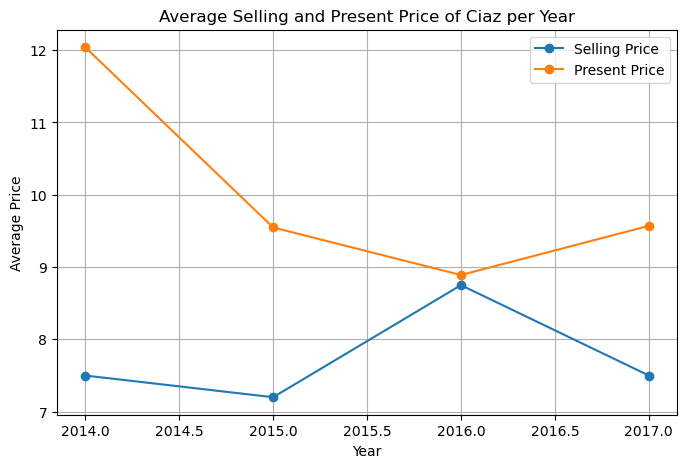

In [15]:
# Filter rows where Car_Name is "ciaz" and select Selling_Price, Present_Price, and Year columns
ciaz_data = car[car['Car_Name'] == 'ciaz'][['Selling_Price', 'Present_Price', 'Year']]

# Group by 'Year' and calculate the mean 'Selling_Price' and 'Present_Price'
grouped_ciaz = ciaz_data.groupby('Year')[['Selling_Price', 'Present_Price']].mean().reset_index()

# Plotting the line chart for mean Selling_Price and Present_Price per Year
plt.figure(figsize=(8, 5))
plt.plot(grouped_ciaz['Year'], grouped_ciaz['Selling_Price'], marker='o', linestyle='-', label='Selling Price')
plt.plot(grouped_ciaz['Year'], grouped_ciaz['Present_Price'], marker='o', linestyle='-', label='Present Price')
plt.title('Average Selling and Present Price of Ciaz per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

The results from the line chart were unexpected and contradicted my assumption. The prices of the used cars do not necessarily exhibit larger differences with older model years. Although the price variance was highest in 2014, the difference in prices was greater in 2017 compared to 2016. In 2016, the selling price of the ciaz, a used car, was almost identical to that of the new car. Perhaps other factors might have a more significant impact.

Generate a histogram of the 'Year' column to display the distribution of the continuous variable.

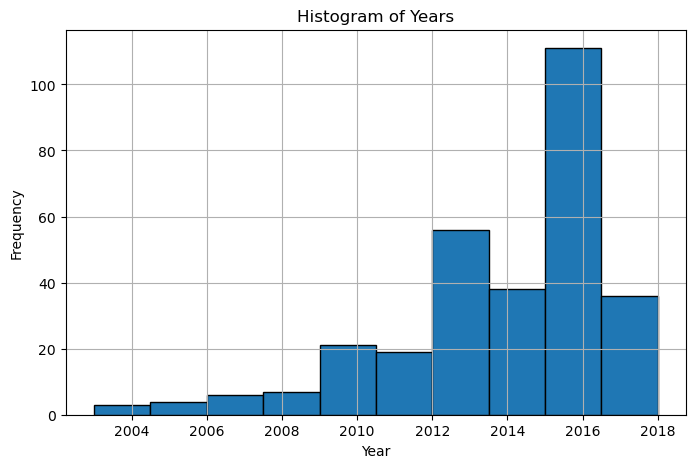

In [16]:
# Plotting the histogram of the 'Year' column
plt.figure(figsize=(8, 5))
plt.hist(car['Year'], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The histogram shows that the year 2016 has the highest number of samples, while 2004 has the fewest.

Generate a pie chart for the 'Fuel_Type' column.

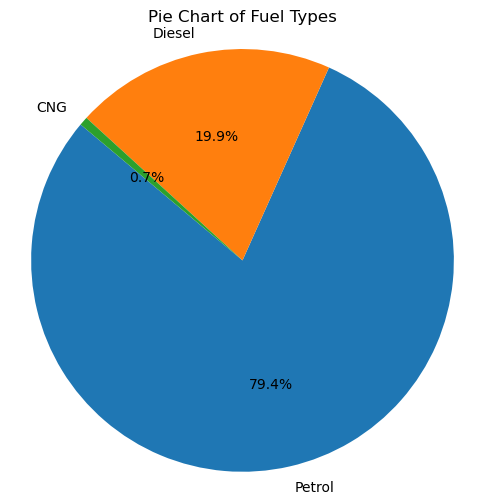

In [17]:
# Calculate the counts for each category in the 'Fuel Type' column
fuel_counts = car['Fuel_Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Fuel Types')
plt.axis('equal')  # Keep the pie chart a circle
plt.show()

The pie chart shows that 79.4% of the cars are petrol-fueled, and 19.9% are diesel-fueled.

Generate boxplots of 'Kms_Driven' based on different 'Owner' counts, providing a separate boxplot for the distribution of kilometers driven for each distinct owner count.

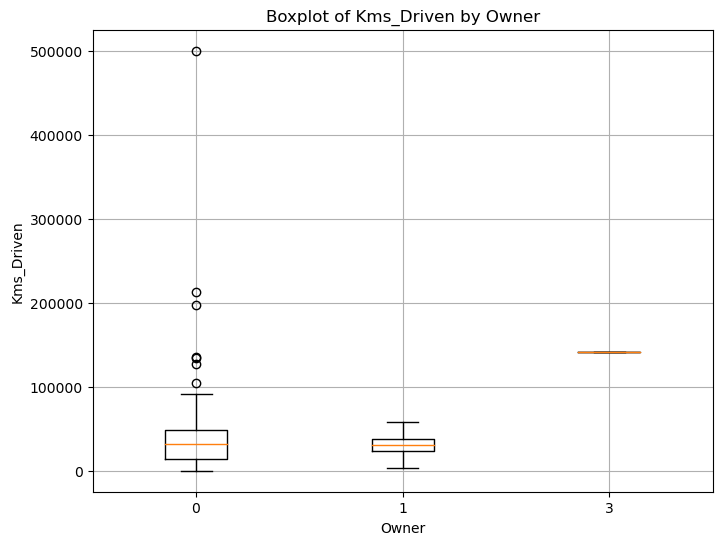

In [24]:
# Generate a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([car[car['Owner'] == i]['Kms_Driven'] for i in car['Owner'].unique()], labels=car['Owner'].unique())
plt.xlabel('Owner')
plt.ylabel('Kms_Driven')
plt.title('Boxplot of Kms_Driven by Owner')
plt.grid(True)
plt.show()

The boxplot illustrates that there is no absolute linear relationship between kilometers driven and the number of owners. The maximum distance traveled is 50,000 km, but it corresponds to only one owner. The upper limit of the median line in the boxplot occurs when there are three owners.

Generate a violin plot of 'Present_Price' based on different counts of owners, displaying the distribution of 'Present_Price' for each count of owners.

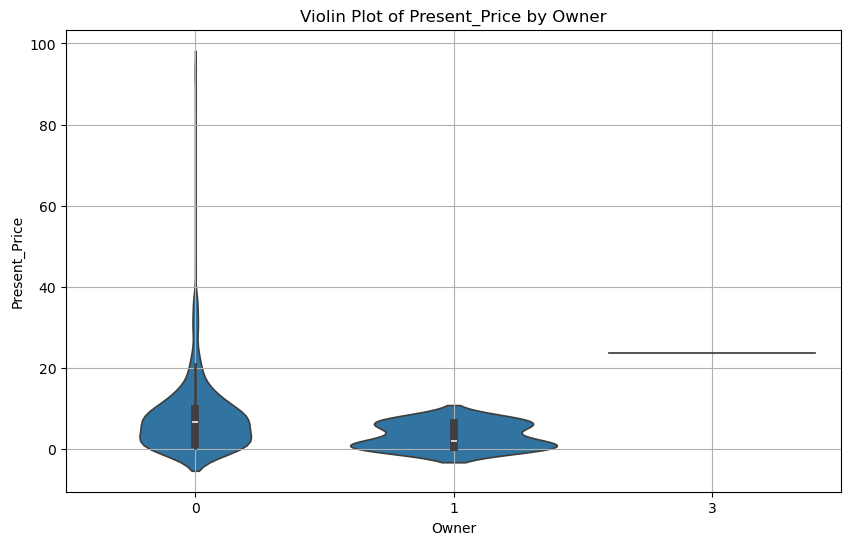

In [26]:
# Plotting the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Owner', y='Present_Price', data=car)
plt.xlabel('Owner')
plt.ylabel('Present_Price')
plt.title('Violin Plot of Present_Price by Owner')
plt.grid(True)
plt.show()

"The violin plot indicates that fewer owners correspond to relatively cheaper prices. Additionally, fewer owners exhibit a wider price range."

## Data Wrangling

Before conducting data analysis, it's essential to preprocess the data. Firstly, replace the values in the columns 'Transmission', 'Fuel_Type' and 'Seller_Type' with numeric representations. Regarding the 'Owner' column, as the count of owners for used cars cannot be zero, convert '0' owner count to '1' and '1' owner count to '2'.

In [2]:
# Mapping categorical values to numerical representations
car['Fuel_Type'] = car['Fuel_Type'].map({'Petrol': 1, 'Diesel': 2, 'CNG': 3})
car['Seller_Type'] = car['Seller_Type'].map({'Dealer': 1, 'Individual': 2})
car['Transmission'] = car['Transmission'].map({'Manual': 1, 'Automatic': 2})

In [31]:
car.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,2,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,2,1,1,0
5,vitara brezza,2018,9.25,9.83,2071,2,1,1,0
6,ciaz,2015,6.75,8.12,18796,1,1,1,0
7,s cross,2015,6.50,8.61,33429,2,1,1,0
8,ciaz,2016,8.75,8.89,20273,2,1,1,0
9,ciaz,2015,7.45,8.92,42367,2,1,1,0


In [3]:
#Output the data type and quantity of the 'Type of place of residence' column in the data set
element_counts = car['Owner'].value_counts()
print(element_counts)#Print out

0    290
1     10
3      1
Name: Owner, dtype: int64


In [4]:
car['Owner'] = car['Owner'].replace({0: 1, 1: 2})

In [34]:
car.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,1
1,sx4,2013,4.75,9.54,43000,2,1,1,1
2,ciaz,2017,7.25,9.85,6900,1,1,1,1
3,wagon r,2011,2.85,4.15,5200,1,1,1,1
4,swift,2014,4.60,6.87,42450,2,1,1,1
5,vitara brezza,2018,9.25,9.83,2071,2,1,1,1
6,ciaz,2015,6.75,8.12,18796,1,1,1,1
7,s cross,2015,6.50,8.61,33429,2,1,1,1
8,ciaz,2016,8.75,8.89,20273,2,1,1,1
9,ciaz,2015,7.45,8.92,42367,2,1,1,1


In [37]:
# Check for null values in each column
null_columns = car.columns[car.isnull().any()]
print(car[null_columns].isnull().sum())


Series([], dtype: float64)


## Data Analysis

### Hypothesis Testing

Conduct a multivariate linear regression utilizing the statistical library statmodels. Assess the significance of the independent variables on the dependent variable via hypothesis testing.

In [35]:
# Define the independent and dependent variables
X = car[['Fuel_Type', 'Seller_Type', 'Transmission','Owner','Selling_Price','Year']]  # Independent variables
y = car['Present_Price']  # Dependent variable

# Add Intercept Column for the intercept term in linear regression
X['intercept'] = 1

# Fit the model using ordinary least squares (OLS)
model = sm.OLS(y, X).fit()

# Print summary of the regression results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Present_Price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     263.4
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          4.35e-115
Time:                        02:25:06   Log-Likelihood:                -797.04
No. Observations:                 301   AIC:                             1608.
Df Residuals:                     294   BIC:                             1634.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Fuel_Type        -0.7117      0.554     -1.286      0.200      -1.801       0.378
Seller_Type      -0.2091      0.516     -0.405      0.686      -1.225       0.807
Transmission     -0.0243      0.652     -0.037      0.970      -1.307       1.258
Owner             1.0620      0.962      1.104      0.270      -0.831       2.955
Selling_Price     1.6267      0.059     27.612      0.000       1.511       1.743
Year             -0.7999      0.073    -10.923      0.000      -0.944      -0.656
intercept      1610.8052    147.596     10.914      0.000    1320.327    1901.283
==============================================================================
Omnibus:                      258.750   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11965.690
Skew:                           3.097   Prob(JB):                         0.00
Kurtosis:                      33.261   Cond. No.                     1.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# Obtain the P-value of each independent variable
p_values = model.pvalues
# Select independent variables with a significance level less than 5%
significant_variables = p_values[p_values < 0.05]
significant_variables

Selling_Price    1.203615e-83
Year             1.537398e-23
intercept        1.658413e-23
dtype: float64

### Regression

In [38]:
# Assume 'Present_Price' is the dependent variable and the other columns are independent variables
# Select independent variables
independent_variables = ['Fuel_Type', 'Seller_Type', 'Transmission','Owner','Selling_Price','Year','Kms_Driven']
X = sm.add_constant(car[independent_variables])
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Present_Price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          8.88e-115
Time:                        02:25:21   Log-Likelihood:                -794.86
No. Observations:                 301   AIC:                             1606.
Df Residuals:                     293   BIC:                             1635.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1423.5178    172.477      8.253

Extract variables from the above regression model that exhibit significance levels below 5%, and print the indices of these variables for further analysis and interpretation.

In [39]:
# Extract significant variables from the regression model at a 5% significance level
significant_vars = model.pvalues[model.pvalues < 0.05].index
# Print the significant variables found
print("\nb) Statistically significant variables at the 5% level:")
print(significant_vars)


b) Statistically significant variables at the 5% level:
Index(['const', 'Selling_Price', 'Year', 'Kms_Driven'], dtype='object')


In [40]:
# Extract coefficients of statistically significant variables from the model
coefficients = model.params.loc[significant_vars]
# Print regression coefficients of statistically significant variables
print("\nc) Regression coefficients of statistically significant variables:")
print(round(coefficients, 3))


c) Regression coefficients of statistically significant variables:
const            1423.518
Selling_Price       1.629
Year               -0.707
Kms_Driven          0.000
dtype: float64


### Clustering

In [5]:
#create a subset
car_sub = car[['Selling_Price','Fuel_Type',]]

In [6]:
# Display the first 10 rows of the 'car_sub' DataFrame
car_sub.head(10)

,Selling_Price,Fuel_Type
0,3.35,1
1,4.75,2
2,7.25,1
3,2.85,1
4,4.60,2
5,9.25,2
6,6.75,1
7,6.50,2
8,8.75,2
9,7.45,2


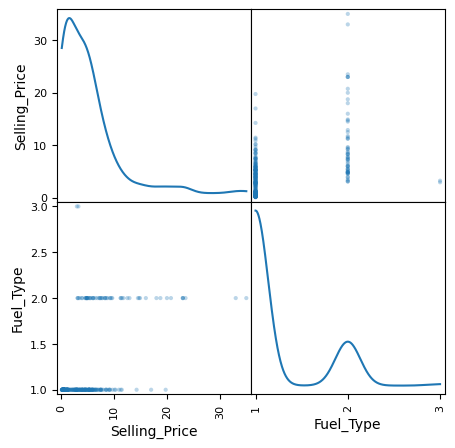

In [7]:
# Create a scatter matrix plot based on the 'car_sub' DataFrame
output = pd.plotting.scatter_matrix(car_sub, alpha=0.3, figsize=(5, 5), diagonal='kde')

In [8]:
# Create an empty list to store distortion values.
distortions = []
#Defines for between 1 and 10 clusters
K = range(1,11) 
#Perform traversal operation
for k in K: 
    #For each value of K, creates a KMeans model with 'k' clusters.
    kmeanModel = KMeans(n_clusters=k)
    #Fits the KMeans model to the 'car_sub' dataset.
    kmeanModel.fit(car_sub)
    # Appends the inertia value to the list.
    distortions.append(kmeanModel.inertia_)

C:\Users\Wilonhan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Wilonhan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Wilonhan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Wilonhan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

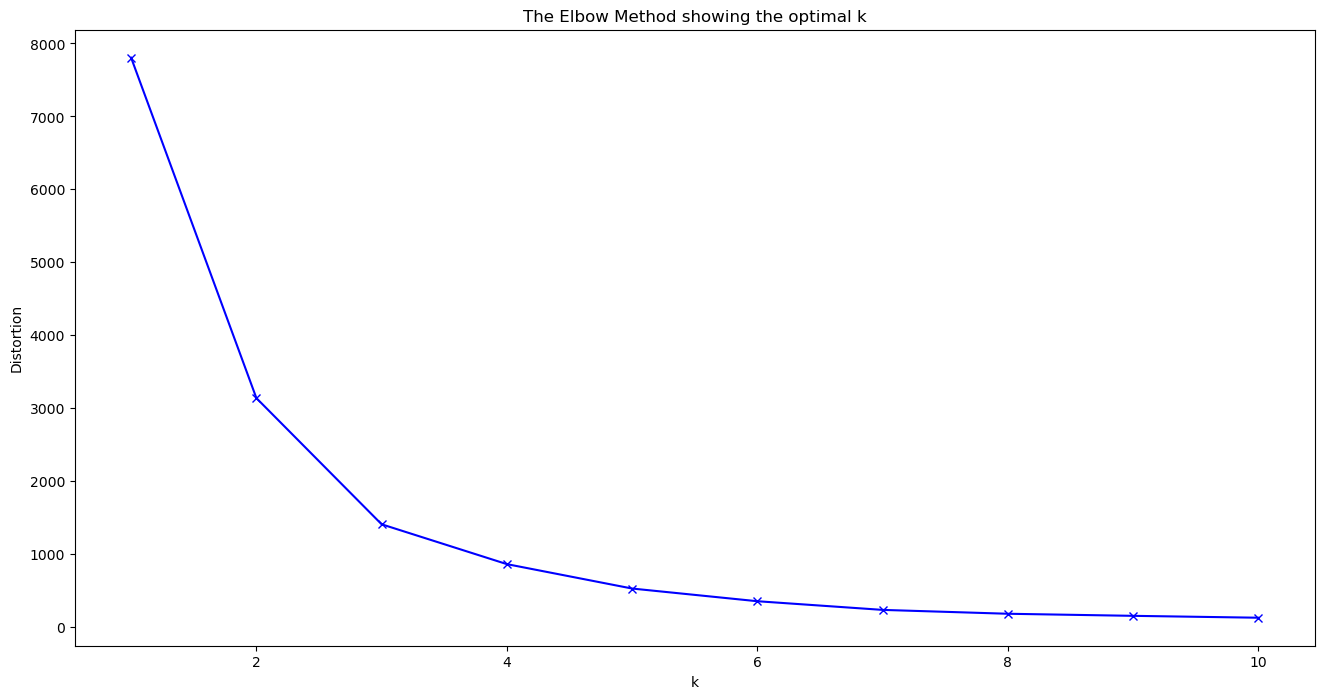

In [9]:
#plot the distortions against the number of clusters and find the best value
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the plot above, it looks like there is a big drop between 2 and 4, so we'll use 3 clusters to calculate our K-Means mode

In [10]:
# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)

In [11]:
# Fit the KMeans model to the 'car_sub' dataset
kmeans.fit(car_sub)

C:\Users\Wilonhan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Wilonhan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
# Access the cluster labels assigned by KMeans to each data point in 'car_sub'
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]

In [13]:
# Store the cluster labels assigned by KMeans to each data point in 'car_sub' in the variable 'kmeans_labels'
kmeans_labels = kmeans.labels_

In [14]:
# Calculate the silhouette score using the cluster labels obtained from KMeans applied on 'car_sub' dataset
metrics.silhouette_score=metrics.silhouette_score(car_sub, kmeans_labels)
# Display the silhouette score rounded to three decimal places
print(round(metrics.silhouette_score, 3))

0.592


In [15]:
car_sub['kClusters'] = kmeans_labels

In [16]:
car_sub.head(10)

,Selling_Price,Fuel_Type,kClusters
0,3.35,1,0
1,4.75,2,1
2,7.25,1,1
3,2.85,1,0
4,4.60,2,1
5,9.25,2,1
6,6.75,1,1
7,6.50,2,1
8,8.75,2,1
9,7.45,2,1


In [17]:
car_sub['kClusters'].value_counts()

0    167
1    117
2     17
Name: kClusters, dtype: int64

### DBSCAN Methods

In [5]:
#create a subset
car_sub1 = car[['Selling_Price','Seller_Type']]

In [6]:
# Create a DBSCAN clustering model with epsilon (eps) set to 1 and minimum samples (min_samples) set to 20
dbscan = DBSCAN(eps=10, min_samples=40)

In [7]:
# Fit the DBSCAN model to the 'car_sub1' dataset
dbscan.fit(car_sub1)

DBSCAN(eps=10, min_samples=40)

In [8]:
# Store the cluster labels assigned by DBSCAN to each data point in 'car_sub1' in the variable 'dbscan_labels'
dbscan_labels = dbscan.labels_

In [9]:
# Variable containing the cluster labels assigned by DBSCAN to data points in 'car_sub1'
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [10]:
# Create a new column 'dClusters' in the 'car_sub1' DataFrame and assign the DBSCAN cluster labels to it
car_sub1['dClusters1'] = dbscan_labels

In [11]:
# Calculate the silhouette score using the DBSCAN cluster labels obtained for the 'anemia_sub1' dataset
metrics.silhouette_score = metrics.silhouette_score(car_sub1, dbscan_labels)
# Display the silhouette score rounded to three decimal places
print(round(metrics.silhouette_score, 3))

0.822


In [6]:
#create a subset
car_sub2 = car[['Selling_Price','Transmission']]

In [7]:
# Create a DBSCAN clustering model with epsilon (eps) set to 1 and minimum samples (min_samples) set to 20
dbscan = DBSCAN(eps=10, min_samples=40)

In [8]:
# Fit the DBSCAN model to the 'car_sub2' dataset
dbscan.fit(car_sub2)

DBSCAN(eps=10, min_samples=40)

In [9]:
dbscan_labels = dbscan.labels_

In [10]:
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [11]:
# Create a new column 'dClusters' in the 'car_sub2' DataFrame and assign the DBSCAN cluster labels to it
car_sub2['dClusters2'] = dbscan_labels

In [12]:
# Calculate the silhouette score using the DBSCAN cluster labels obtained for the 'car_sub2' dataset
metrics.silhouette_score = metrics.silhouette_score(car_sub2, dbscan_labels)
# Display the silhouette score rounded to three decimal places
print(round(metrics.silhouette_score, 3))

0.822


### Classification Analysis

In [5]:
le = LabelEncoder() # creates the LabelEncoder object
labels_fea = le.fit_transform(car['Selling_Price']) 

In [6]:
#view the labels
labels_fea

array([ 59,  78, 112,  52,  76, 128, 107, 104, 124, 114,  52, 108, 115,
        99,  45, 116, 112, 116,  58,  49,  52,  81,  74,  47,  53,  55,
        72,  98,  42, 114,  56,  46,  82,  98,  91,  54,  77,  11,  55,
        45,  95,  48,  42,  91,  35, 115,  49,  30,  94, 116, 144, 152,
       147, 145,  51,  64,  75,  78,  71, 150, 109,  75, 148, 153, 154,
        78, 149, 128,  73, 141,  69,  75, 114,  49,  81,  69,  91,  38,
        87, 142, 143,  78, 152, 139,  61,  47, 155,  96,  60,  78,  67,
       135,  63, 152,  70,  95, 151, 146, 110, 130,  41,  40,  39,  37,
        36,  36,  36,  35,  34,  34,  34,  33,  33,  33,  33,  32,  31,
        31,  31,  30,  30,  30,  30,  29,  28,  27,  27,  24,  26,  25,
        24,  24,  24,  23,  22,  22,  22,  22,  21,  21,  21,  21,  21,
        21,  21,  21,  20,  20,  19,  18,  17,  17,  17,  17,  17,  16,
        16,  16,  16,  15,  15,  15,  15,  15,  15,  15,  15,  14,  14,
        13,  13,  13,  13,  13,  12,  12,  11,  11,  11,  10,   

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#create a subset we're first going to use:
car_sub = car[['Owner','Transmission','Seller_Type','Fuel_Type']]

In [9]:
#view the top of the subset
car_sub.head(10)

,Owner,Transmission,Seller_Type,Fuel_Type
0,1,1,1,1
1,1,1,1,2
2,1,1,1,1
3,1,1,1,1
4,1,1,1,2
5,1,1,1,2
6,1,1,1,1
7,1,1,1,2
8,1,1,1,2
9,1,1,1,2


In [10]:
train_data, test_data, train_lab, test_lab = train_test_split(car_sub, labels_fea) 

In [11]:
#len() #check the length of the training data
len(train_data)

225

In [12]:
#check the length of the test data
len(test_data)

76

In [13]:
#check the length of the training labels
len(train_lab)

225

In [14]:
#check the length of the test labels
len(test_lab)

76

k-Nearest Neighbours

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
#create a KNeighborsClassifier using 10 neighbours
knn = KNeighborsClassifier(n_neighbors=10)  

In [18]:
#runs the classifier on the training dataset and labels
knn.fit(train_data, train_lab)  

KNeighborsClassifier(n_neighbors=10)

In [19]:
knn.score(test_data, test_lab)  

0.039473684210526314

Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier
# create a DecisionTreeClassifer
dt = DecisionTreeClassifier()  
#then fit the model using your training data and training labels
dt.fit(train_data,train_lab)
dt.score(test_data,test_lab)

0.013157894736842105

## Results & Visualisation

### Hypothesis Testing

In the first section, hypothesis testing is employed. A significance level of 0.05 is set, and if the result is less than 0.05, the null hypothesis is rejected. The p-value for Selling_Price is 1.203615e-83, which is extremely close to zero. This implies strong evidence that Selling_Price significantly impacts the model. Similarly, the p-value for Year is 1.537398e-23, also very close to zero, indicating a significant effect of Year on the model.

In [41]:
# Obtain the P-value of each independent variable
p_values = model.pvalues
# Select independent variables with a significance level less than 5%
significant_variables = p_values[p_values < 0.05]
significant_variables

const            5.304905e-15
Selling_Price    3.638161e-84
Year             5.052383e-15
Kms_Driven       3.954087e-02
dtype: float64

<Figure size 1200x1000 with 0 Axes>

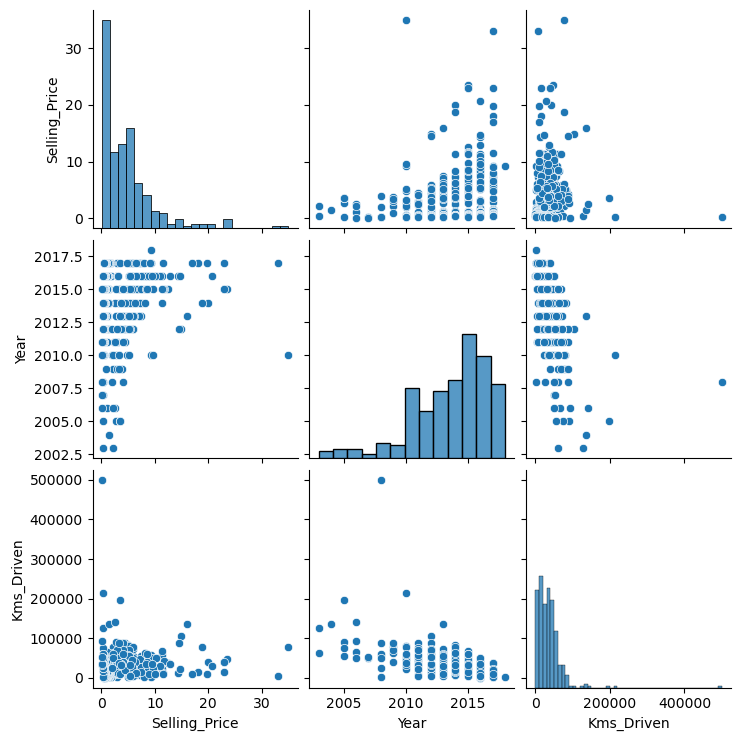

In [43]:
import warnings
warnings.filterwarnings('ignore')
# Draw a matrix scatter plot using Seaborn's pairplot function
plt.figure(figsize=(12, 10))
sns.pairplot(car.loc[:, ['Selling_Price', 'Year', 'Kms_Driven']])
plt.show()

Based on the above test, when the significance level is 5%, the independent variables that affect the significance of the dependent variable are:Selling_Price, Year and Kms_Driven.

### Regression

In the second section, the result indicated by using regression shows that, at a 5% significance level, the statistically significant variables in the regression model include 'const', 'Selling_Price', 'Year', and 'Kms_Driven'. These variables are deemed to have a significant impact on the dependent variable in the model.

These coefficients represent the impact of significant variables in the regression model. For every unit increase in Selling_Price, the dependent variable is expected to increase by approximately 1.629 units. An increase of one unit in Year is associated with a decrease of approximately 0.707 units in the dependent variable. The coefficient for 'Kms_Driven' is very small (around 0.000), suggesting a negligible impact on the dependent variable within this model.

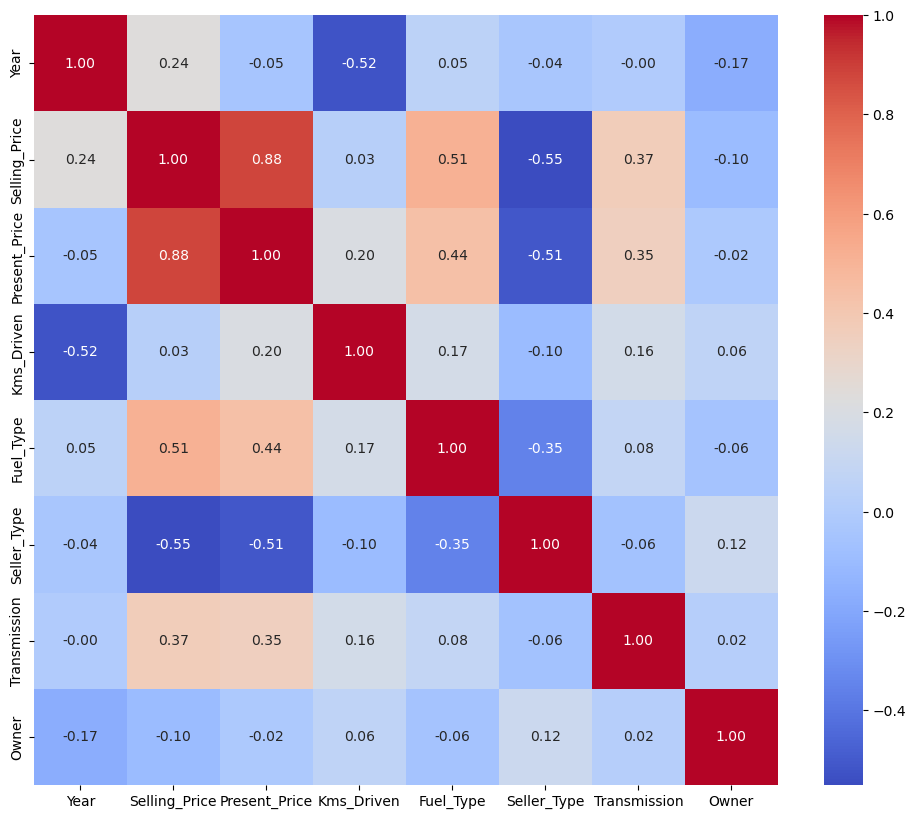

In [47]:
# Draw heat map
# Correlations between of all variables
correlation_matrix = car.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

According to the heatmap, the most significant positive correlation appears in "Selling_Price" with a correlation coefficient of 0.88, indicating a considerably strong positive relationship. This aligns with common knowledge, suggesting a substantial connection between the original price and the resale price. Additionally, these variables exhibit a moderate negative correlation with "Seller_Type," implying that dealer prices are lower than those of individual sellers. This could be attributed to dealers offering lower discounts or running promotional activities, while individual sellers might value their vehicles more and therefore price them higher. Next is the fuel type, which shows a moderate impact on the selling price. Apart from this, it seems that the selling price doesn't have significant correlations with other factors.

### Clustering

In the third section, clustering algorithms were utilized, namely Kmeans and DBSCAN, resulting in silhouette scores of 0.805 (DBSCAN) and 0.633 (Kmeans) respectively. With the higher silhouette score of DBSCAN, it suggests a closer relationship between features in the clusters obtained through DBSCAN. The silhouette scores of Seller_Type and Transmission are closer to 1 compared to Fuel_Type, indicating a tighter association in forming clusters, better distinguishing clusters with distinct feature differences.

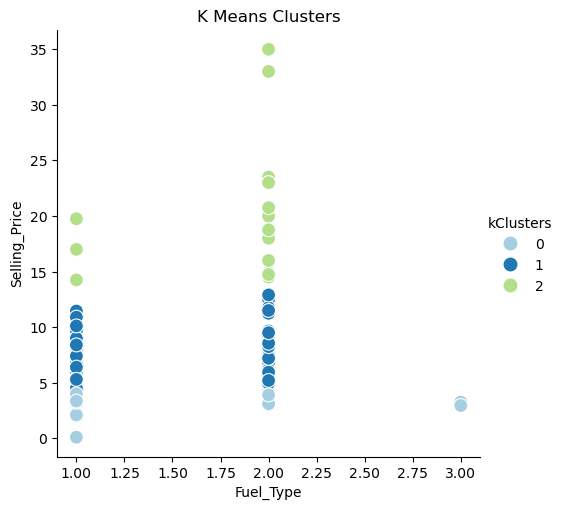

In [18]:
fig = sns.relplot(data = car_sub, x = "Fuel_Type", y = "Selling_Price", s = 100, hue = "kClusters", palette = "Paired") 
plt.xlabel("Fuel_Type") 
plt.ylabel("Selling_Price") 
plt.title("K Means Clusters")
plt.show() 

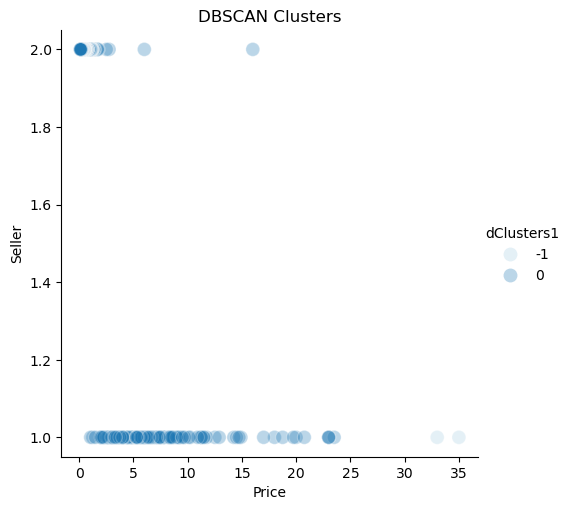

In [12]:
fig = sns.relplot(data = car_sub1, x = "Selling_Price", y = "Seller_Type", s = 100, hue = "dClusters1", palette = "Paired", alpha = 0.3) 
plt.xlabel("Price") 
plt.ylabel("Seller") 
plt.title("DBSCAN Clusters")
plt.show() 

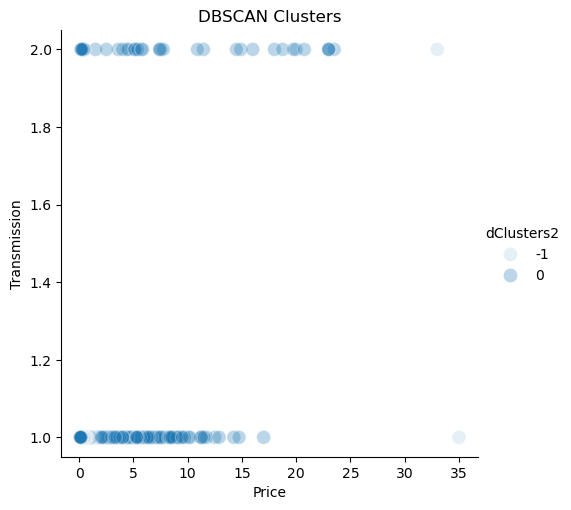

In [14]:
fig = sns.relplot(data = car_sub2, x = "Selling_Price", y = "Transmission", s = 100, hue = "dClusters2", palette = "Paired", alpha = 0.3) 
plt.xlabel("Price") 
plt.ylabel("Transmission") 
plt.title("DBSCAN Clusters")
plt.show() 

### Classification Analysis

In the fourth section, classification methods were employed. Using the "train_test_split" method, the data was initially split in a 65:35 ratio. The training data was then utilized for the kNN classifier, yielding a score of 0.0394, indicating a relatively low accuracy for this model. Subsequently, decision trees were employed, yet results were observed to be similar to those obtained from kNN.

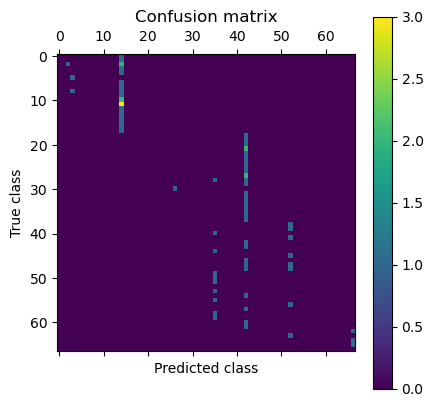

In [23]:
from sklearn import metrics
#add the test labels and the predictions to create the confusion matrix
predictions = knn.predict(test_data)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)
#plots the confusion matrix
plt.matshow(confusion_matrix) 
#adds a colour bar 
plt.colorbar() 
#change the title to Confusion matrix
plt.title('Confusion matrix')
#set the ylabel to True class and the x label to Predicted class
plt.ylabel('True class')
plt.xlabel('Predicted class')
#then show the plot
plt.show()

In [24]:
print(metrics.classification_report(test_lab, predictions, zero_division = 0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          33       0.05      1.00      0.09         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          41       0.00    

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          33       0.05      1.00      0.09         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          41       0.00    

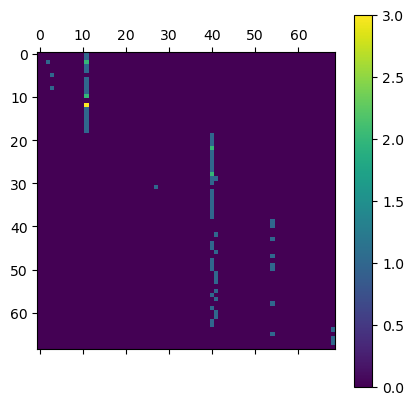

In [25]:
prediction_dt = dt.predict(test_data)
child_pred = pd.DataFrame(list(predictions))
confusion_matrix = metrics.confusion_matrix(test_lab,prediction_dt)
plt.matshow(confusion_matrix)
plt.colorbar()
print(metrics.classification_report(test_lab, predictions, zero_division = 0))

## Discussion

In my research, I explored various analytical methods, including clustering, regression, hypothesis testing, and classification techniques, to uncover the factors influencing the prices of used cars. Initially, I hypothesized that the age of a car was the primary factor affecting its resale value, assuming that older cars would have lower prices. However, through validation using methods like clustering and hypothesis testing, I discovered that the age of the car wasn't the primary influencer of used car prices. Consequently, I developed a corresponding regression model. The determination coefficient (R2) for these seven factors reached 84.5%. Utilizing this regression model, I estimated used car prices using machine learning algorithms. A heatmap revealed a correlation of only 0.24 between the age of the car and its resale value. Regression analysis highlighted the original price of the car as the most influential factor, with a correlation as high as 0.88, signifying a profound impact of the original price on the used car price. Additionally, combining the results from clustering, I found that the type of fuel and the dealer type were the second most influential factors, implying significant effects on used car prices by different fuel types and dealers. These results significantly differed from the initial research hypothesis, indicating that multiple factors collectively influence used car prices, rather than a single determinant.

Firstly, similar to Nasiboglu's[2020] conclusion, I found that cars with higher selling prices had higher resale values. High-value cars usually offer more features and advanced technology, thus maintaining relatively higher appeal in the used car market. Additionally, premium models tend to exhibit better durability and longer lifespans, thereby retaining higher value in the second-hand market. Brand recognition and the vehicle's history may also impact used car prices as some renowned brands enjoy higher popularity in the used car market. Surprisingly, individual sellers priced their used cars higher than dealers. Beuving's [2004] comparison between dealers and individual sellers elucidated this difference, where dealers' prices were lower due to their access to greater discounts, resources, and channels to acquire vehicles, allowing them to competitively price used cars. In contrast, individual sellers might attach higher prices due to their emotional attachment and perceived value of their vehicles. Gilmore's [2013] study explained the higher prices of diesel cars, attributing it to their engines' typically higher torque, suitable for applications requiring more torque. Consequently, diesel cars might perform better in certain performance aspects. Moreover, some maintenance and repair costs for diesel cars are higher than gasoline cars, potentially reflected in their prices.

These conclusions might offer guidance to individuals facing economic challenges due to the pandemic when selecting used cars. Understanding the factors influencing higher prices enables buyers to better assess the value and consider long-term investment benefits and performance advantages of these vehicles. Furthermore, comprehending the varying impact of each factor helps in choosing a vehicle based on individual performance needs. Sellers, especially with high original-priced vehicles or diesel cars, can develop more targeted pricing strategies, emphasizing fuel efficiency, performance advantages, and long-term returns on investment in their promotions. This attracts consumers focused on long-term costs and performance.

However, my research has limitations. It mainly focuses on the relationship between used car prices and a few key factors, overlooking dynamic market elements like economic cycles, consumer trends, supply-demand dynamics, which could influence prices. Also, consumer behavior might significantly differ across countries and regions, potentially affecting used car prices. Future studies could explore how these factors shape price variations in the used car market. Additionally, the research relies on specific datasets, possibly limiting the representativeness and reliability. Future studies could enhance representativeness and reliability by incorporating more diverse data sources and comprehensive sampling methods.

## Conclusion

Through methods such as clustering, regression, and hypothesis testing, this study revealed that the price of used cars is influenced by various factors. Among them, the original price, fuel type, and dealership type stand out as key determinants, surpassing the initial research assumption of the vehicle's age. These findings provide crucial insights for both buyers and sellers in the used car market, enabling a better understanding of the price formation mechanism. Buyers can comprehensively assess the value of vehicles, considering long-term investments and performance advantages. Meanwhile, sellers can develop more targeted pricing strategies based on different factors to enhance attractiveness. While not directly exploring the impact of urban data science factors on used car prices, the models employed in this project can be extrapolated to urban data science, offering valuable insights for urban planning. Furthermore, delving into specific urban aspects related to used car influencing factors, such as demand for specific vehicle models or power types, could extend the study to urban development. Acording to Lai's research[2014],this could show the need for new roads , infrastructure requirements, providing a new perspective and insights for the field of urban data science.

## Reference

Beuving, J.J., 2004. Cotonou's Klondike: African traders and second-hand car markets in Bénin. The Journal of Modern African Studies, 42(4), pp.511-537.

Cornut, B., 2016. Longitudinal analysis of car ownership and car travel demand in the Paris region using a pseudo-panel data approach. Transportation Research Procedia, 13, pp.61-71.

Gilmore, E.A. and Lave, L.B., 2013. Comparing resale prices and total cost of ownership for gasoline, hybrid and diesel passenger cars and trucks. Transport Policy, 27, pp.200-208.

Kim, N.L. and Kim, T.H., 2022. Why buy used clothing during the pandemic? Examining the impact of COVID-19 on consumers’ secondhand fashion consumption motivations. The International Review of Retail, Distribution and Consumer Research, 32(2), pp.151-166.

Lai, L. and Li, Z.X., 2014. On the Coordinated Development of Land Utilization and Traffic Demand in Mountain High-Density City-A Case Study of Chongqing Main City. Applied Mechanics and Materials, 522, pp.1649-1655.

Nasiboglu, R. and Akdogan, A., 2020. Estimation of the second hand car prices from data extracted via web scraping techniques. Journal of Modern Technology and Engineering, 5(2), pp.157-166.

Peerun, S., Chummun, N.H. and Pudaruth, S., 2015, June. Predicting the price of second-hand cars using artificial neural networks. In The Second International Conference on Data Mining, Internet Computing, and Big Data (No. August, pp. 17-21).

Prado, S.M., 2010. Macroeconomics of the new and the used car markets. Economics Bulletin, AccessEcon, 30(3), pp.1862-1884.

Thomas, V.M., 2003. Demand and dematerialization impacts of second‐hand markets: Reuse or more use?. Journal of Industrial Ecology, 7(2), pp.65-78.